In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
import math
import matplotlib.animation as manimation
from IPython.display import HTML
import csv 

In [19]:
x_orig = np.array([-1, -1, 0, 0, 1, 1, 2, 2, 2, 1, 0, -1, -1, 0, 1, 2])
y_orig = np.array([0, -1, -1, 0, 0, -1, -1, 0, 1, 1, 1, 1, 2, 2, 2, 2])
coords = np.mat([x_orig,y_orig]).T
plt.plot(coords[:,0],coords[:,1], marker='o')
plt.xlim(-5,+5)
plt.ylim(-5,+5)
plt.grid()
plt.show()

In [20]:
def rad_gyr(coords):
    x_com = float(sum(coords[:,0])/16)
    y_com = float(sum(coords[:,1])/16)
    com = np.mat([[x_com],[y_com]])
    r_g = 0
    for i in range(16):
        r_g += math.dist(coords[i].T,com)**2/16
    r_g = math.sqrt(r_g)
    return r_g
rad_gyr(coords)

1.5811388300841898

In [53]:
#Interaction Energies
def interaction_check(coords):
    Int_En = 0
    for i in range(16):
        for j in range(i+2,16):
            if np.linalg.norm(coords[i] - coords[j]) == 1:
#                 plt.plot([coords[i,0],coords[j,0]],[coords[i,1],coords[j,1]], 'o:k')
                Int_En=Int_En+1
    return Int_En
interaction_check(coords)

plt.plot(coords[:,0],coords[:,1], marker='o')
plt.show()  


In [68]:
def orig_int_check(coords):
    Int_En = 9 
    if np.linalg.norm(coords[0]-coords[11]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[0]-coords[3]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[3]-coords[10]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[2]-coords[5]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[4]-coords[7]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[4]-coords[9]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[10]-coords[13]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[9]-coords[14]) !=1:
        Int_En = Int_En - 1
    if np.linalg.norm(coords[8]-coords[15]) !=1:
        Int_En = Int_En - 1
    return Int_En
orig_int_check(coords)

0

In [104]:
# END MOVE
def end_move(p,energy):
    if(p == 15):
        if coords[p-1,0] == coords[p,0]:
            poss_moves = [[coords[p-1,0]-1,coords[p-1,1]],
                           [coords[p-1,0]+1,coords[p-1,1]]]
            check = [1,1]
            for i in range(2):
                for j in range(coords.shape[0]):
                    if j==p or j == p-1:
                        continue
                    if coords[j,0]==poss_moves[i][0] and coords[j,1]==poss_moves[i][1]:
                        check[i] = 0
                        break
            metro_end(coords,p,energy,check,poss_moves)            
        else:
            poss_moves = [[coords[p-1,0],coords[p-1,1]+1],
                           [coords[p-1,0],coords[p-1,1]-1]]
            r_2 = random.randint(0,1)
            check = [1,1]
            for i in range(2):
                for j in range(coords.shape[0]):
                    if j==p or j == p-1:
                        continue
                    if coords[j,0]==poss_moves[i][0] and coords[j,1]==poss_moves[i][1]:
                        check[i] = 0
                        break
            metro_end(coords,p,energy,check,poss_moves)
                
    else:
        if coords[p+1,0] == coords[p,0]:
            poss_moves = [[coords[p+1,0]-1,coords[p+1,1]],
                           [coords[p+1,0]+1,coords[p+1,1]]]
            check = [1,1]
            for i in range(2):
                for j in range(coords.shape[0]):
                    if j==p or j == p+1:
                        continue
                    if coords[j,0]==poss_moves[i][0] and coords[j,1]==poss_moves[i][1]:
                        check[i] = 0
                        break
            metro_end(coords,p,energy,check,poss_moves)
        else:
            poss_moves = [[coords[p+1,0],coords[p+1,1]+1],
                           [coords[p+1,0],coords[p+1,1]-1]]
            check = [1,1]
            for i in range(2):
                for j in range(coords.shape[0]):
                    if j==p or j == p+1:
                        continue
                    if coords[j,0]==poss_moves[i][0] and coords[j,1]==poss_moves[i][1]:
                        check[i] = 0
                        break
            metro_end(coords,p,energy,check,poss_moves)
#     plt.plot(coords[:,0],coords[:,1], marker='o')
#     plt.xlim(-5,5)
#     plt.ylim(-5,5)
#     plt.show()
    return coords
    

In [105]:
def metro_end(coords,p,energy,check,poss_moves):
    e_ini = energy*orig_int_check(coords)
    coords_1 = coords
    if check[0] and check[1]:
        r_2 = random.randint(0,1)
        coords_1[p] = poss_moves[r_2]
        e_fin = energy*orig_int_check(coords_1)
        w = np.exp(e_ini - e_fin)
        if w>1:
            coords[p]=coords_1[p]
        else: 
            r_3 = random.random()
            if w>r_3:
                coords[p]=coords_1[p]
    elif check[0]:
        coords_1[p] = poss_moves[0]
        e_fin = energy*orig_int_check(coords_1)
        w = np.exp(e_ini - e_fin)
        if w>1:
            coords[p]=coords_1[p]
        else: 
            r_3 = random.random()
            if w>r_3:
                coords[p]=coords_1[p]
    elif check[1]:
        coords_1[p] = poss_moves[1]
        e_fin = energy*orig_int_check(coords_1)
        w = np.exp(e_ini - e_fin)
        if w>1:
            coords[p]=coords_1[p]
        else: 
            r_3 = random.random()
            if w>r_3:
                coords[p]=coords_1[p]
        
        
        

In [106]:
def metro_corner(coords,p,energy):
    e_ini = energy*orig_int_check(coords)
    coords_1 = coords
    coords_1[p] = [coords_1[p-1,0],coords_1[p+1,1]]
    e_fin = energy*orig_int_check(coords_1)
    w = np.exp(e_ini - e_fin)
    if w>1:
        coords[p] = coords_1[p]
    else:
        r_3 = random.random()
        if w>r_3:
            coords[p]=coords_1[p]
    

In [107]:
#CORNER MOVE 
def corner_move(p,energy):
    if coords[p+1,0]==coords[p,0] and coords[p-1,1]== coords[p,1]:
        check = 1
        for j in range(coords.shape[0]):
            if coords[j,0] == [coords[p-1,0]] and coords[j,1] == coords[p+1,1]:
                check = 0
                break
        if check:
            w = metro_corner(coords,p,energy)
    elif coords[p-1,0]==coords[p,0] and coords[p+1,1]== coords[p,1]:
        check = 1
        for j in range(coords.shape[0]):
            if coords[j,0] == [coords[p+1,0]] and coords[j,1] == coords[p-1,1]:
                check = 0
                break
        if check:
            w = metro_corner(coords,p,energy)
    return coords  

<IPython.core.display.Javascript object>


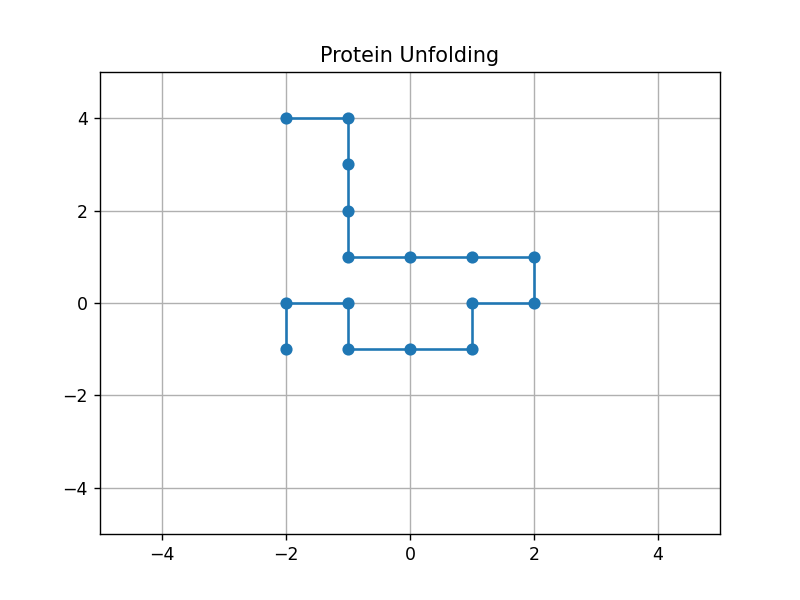

orig interactions:  1
All interactions : 3
Number of microstates : 17
Number of moves: 0
5.926080942153931


In [132]:
# #1000 ITERATIONS WITHOUT INTERACTIONS
coords = np.mat([x_orig,y_orig]).T
%matplotlib notebook
fig = plt.figure()
Int_En = 9
Rand_Int=0
n = 100
moves = 0
rad_gyr_data = np.zeros(n)
# plt.xlim(-5,5)
# plt.ylim(-5,5)

ax = fig.add_subplot(111)
fig.show()
energy = -0.25
start = time.time()
for i in range(n):
    p = random.randint(0,15)
    if p == 15 or p == 0:
        end_move(p,energy)
    else:
        corner_move(p,energy)
    rad_gyr_data[i] = rad_gyr(coords)
    
# x_com = sum(coords[:,0])/16
# y_com = sum(coords[:,1])/16
    plt.cla()
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    ax.plot(coords[:,0],coords[:,1],marker ='o')
    plt.title('Protein Unfolding')
    ax.grid()
 
    fig.canvas.draw()
    time.sleep(0.01)

# plt.plot(coords[:,0],coords[:,1], marker='o')
# plt.xlim(x_com-2.5,x_com+2.5)
# plt.ylim(y_com-2.5,y_com+2.5)


for i in range(16):
    for j in range(i+2,16):
        if np.linalg.norm(coords[i] - coords[j]) == 1:
#             plt.plot([coords[i,0],coords[j,0]],[coords[i,1],coords[j,1]], 'o:k')
            Rand_Int = Rand_Int + 1
# plt.plot(coords[:,0],coords[:,1], marker='o')

# plt.show()
print('orig interactions: ',orig_int_check(coords))
print('All interactions :',Rand_Int)
print('Number of microstates :',len(set(rad_gyr_data)))
print('Number of moves:', moves)
end = time.time()

print(end - start)

In [133]:
#1000 ITERATIONS Export
coords = np.mat([x_orig,y_orig]).T
Int_En = 9
Rand_Int=0
n = 100
moves = 0
rad_gyr_data = np.zeros(n)
e2e_data = np.zeros(n)
energy = -0.25
start = time.time()
code_check = {}
res_num = []
int_energy = []
for i in range(n):
    p = random.randint(0,15)
    res_num.append(p+1)
    if p == 15 or p == 0:
        end_move(p,energy)
        int_energy.append(orig_int_check(coords)*energy)
    else:
        corner_move(p,energy)
        int_energy.append(orig_int_check(coords)*energy)
    rad_gyr_data[i] = rad_gyr(coords)
    e2e_data[i] = math.dist(coords[0].T,coords[15].T)
    
    if rad_gyr_data[i] != rad_gyr_data[i-1] :
        moves = moves+1

        
code_check['res_num'] = res_num
code_check['interaction energy'] = int_energy
code_check['radius of gyration'] = rad_gyr_data
code_check['end-to-end Distance'] = e2e_data

df = pd.DataFrame(code_check)
df.to_csv(r'D:\IIT Madras\Course material\4th Sem\D BT2042 Biophysical\Assignment_1_data\Energy_2.csv', index=False, header=True)
interaction_check(coords)
print('orig interactions: ',orig_int_check(coords))
print('All interactions :',Rand_Int)
print('Number of microstates :',len(set(rad_gyr_data)))
print('Number of moves:', moves)
# print(code_check)
end = time.time()
print(end - start)

orig interactions:  1
All interactions : 0
Number of microstates : 14
Number of moves: 22
0.08104729652404785
